In [207]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [208]:
sns.set(rc={"figure.figsize":(15,8)})

In [209]:
df=pd.read_csv('Bank_Data_Diploma.csv')

<text>
      interest rate indicates the 3-month interest rate between banks
duration indicates the time since the last contact was made with a given consumer.
The previous variable shows whether the any previous marketing campaign was successful with this customer. 
The  march and may are Boolean variables that account for when the call was made to the specific customer .
credit shows if the customer has enough credit to avoid defaulting.

Target:- 
    We want to know whether the bank marketing strategy was successful by classification Ml models , your Target is column 
       y
</text>

In [210]:
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0,1,0,0,117,no
1,0.767,0,0,2,1,274,yes
2,4.858,0,1,0,0,167,no
3,4.120,0,0,0,0,686,yes
4,4.856,0,1,0,0,157,no


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  740 non-null    float64
 1   credit         740 non-null    int64  
 2   march          740 non-null    int64  
 3   may            740 non-null    int64  
 4   previous       740 non-null    int64  
 5   duration       740 non-null    int64  
 6   y              740 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 40.6+ KB


In [212]:
df.duplicated().sum()

6

In [213]:
df.drop_duplicates(inplace=True)

In [214]:
df.reset_index(inplace=True,drop=True)

In [215]:
df.isnull().sum()

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

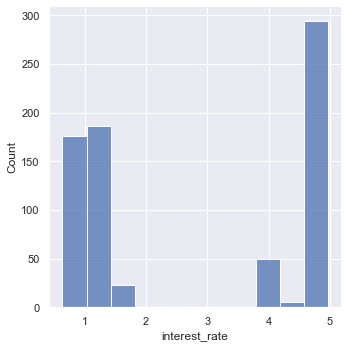

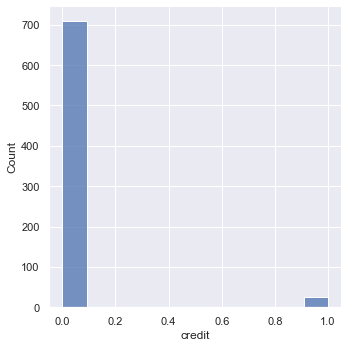

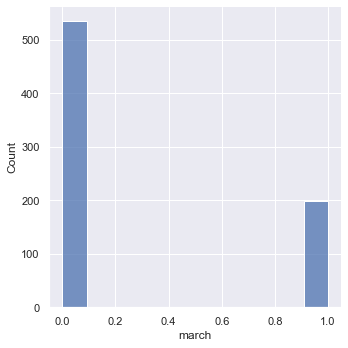

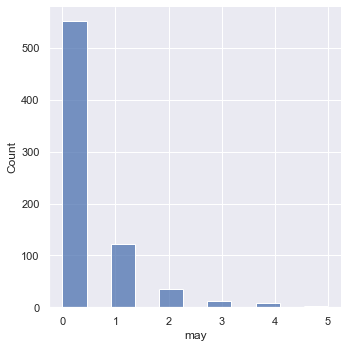

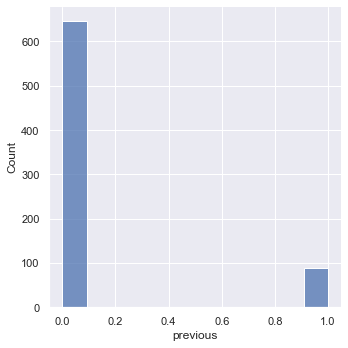

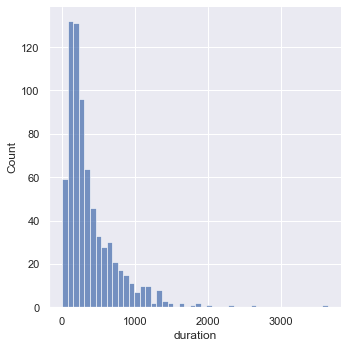

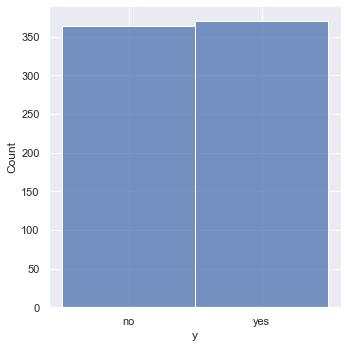

In [216]:
for feature in df.columns:
    sns.displot(data=df,x=feature)

In [217]:
## Data preprocessing (May column-> we will replace the 2,3 and 4 by mean)
def handle_may(x):
    if x in [2,3,4,5]:
        return df['may'].mode()[0]
    else:
        return x


In [218]:
df['may']=df['may'].apply(handle_may)

In [219]:
df['may'].value_counts()

0    611
1    123
Name: may, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

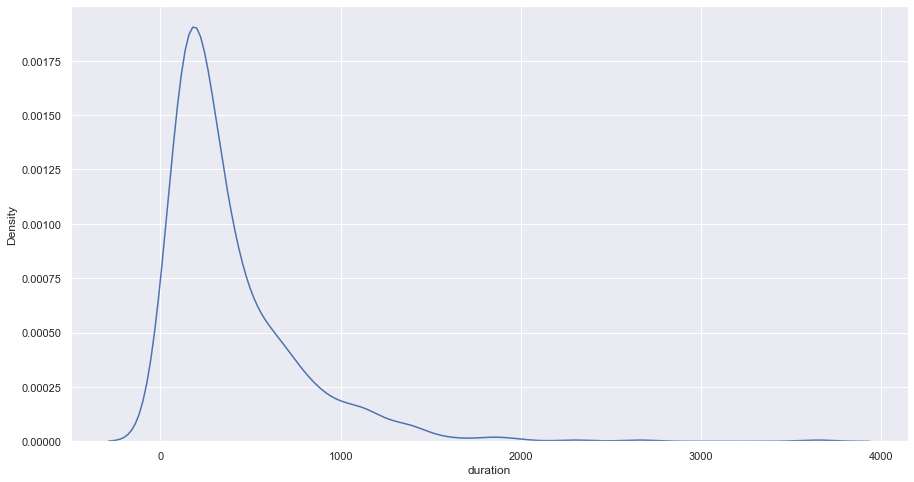

In [220]:
sns.kdeplot(data=df,x='duration')

<AxesSubplot:xlabel='duration'>

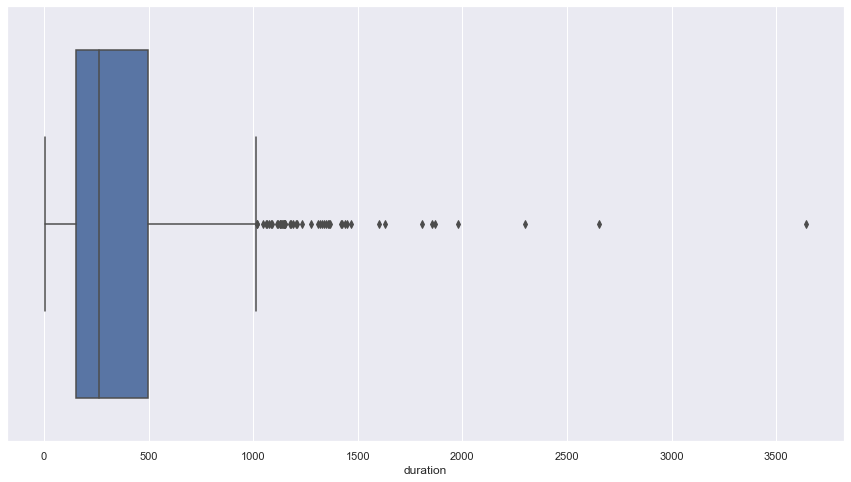

In [221]:
sns.boxplot(data=df,x='duration')

In [222]:
from datasist.structdata import detect_outliers

In [223]:
## Check Outliers from duration feature
df.loc[detect_outliers(df,0,['duration'])]

,interest_rate,credit,march,may,previous,duration,y
36,1.327,0,1,1,0,1135,yes
38,1.811,1,0,0,0,1447,yes
98,4.962,0,0,0,0,1130,yes
123,1.405,0,0,0,0,1348,yes
148,4.153,0,0,0,0,1855,yes
152,4.957,0,0,0,0,1019,yes
159,1.250,0,1,0,0,1068,yes
175,4.958,0,0,0,0,1150,yes
188,4.957,0,0,0,0,1806,yes
209,1.291,0,1,0,0,1062,yes


In [224]:
## drop outliers
idx=detect_outliers(df,0,['duration'])
idx

[36,
 38,
 98,
 123,
 148,
 152,
 159,
 175,
 188,
 209,
 228,
 235,
 245,
 262,
 274,
 283,
 287,
 306,
 327,
 329,
 331,
 341,
 346,
 369,
 370,
 393,
 406,
 455,
 465,
 470,
 481,
 517,
 538,
 540,
 550,
 553,
 561,
 569,
 596,
 629,
 633,
 654,
 657,
 676,
 683,
 685,
 690,
 716]

In [225]:
df.drop(idx,axis=0,inplace=True)

In [226]:
df.reset_index(inplace=True,drop=True)

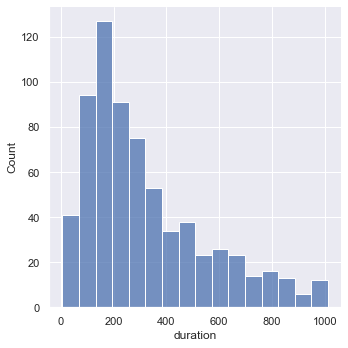

In [227]:
sns.displot(data=df,x='duration')

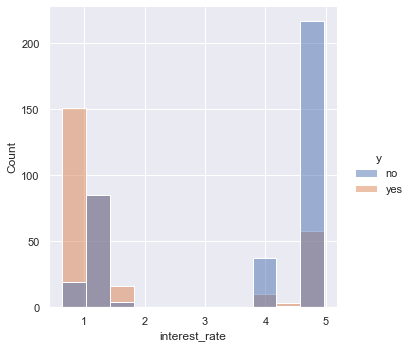

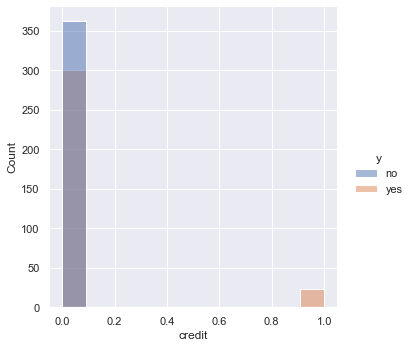

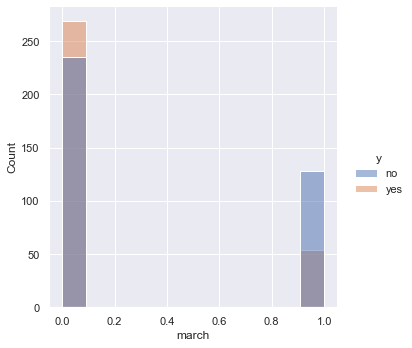

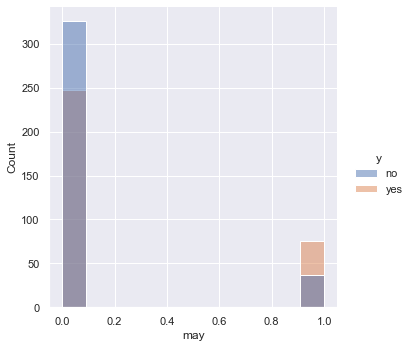

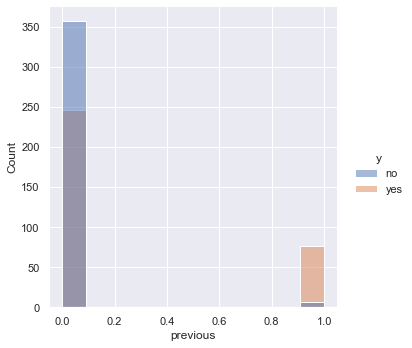

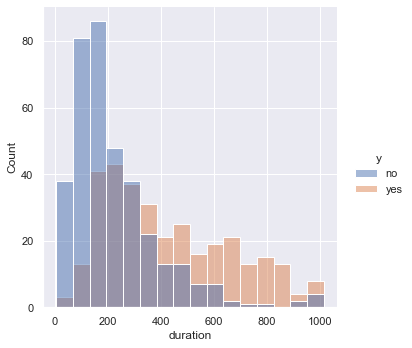

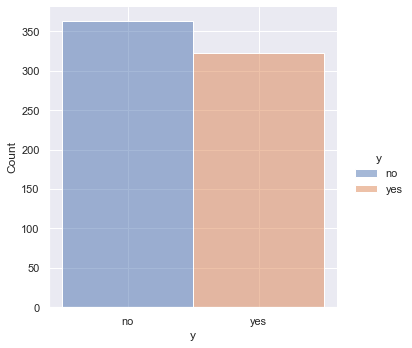

In [228]:
#bivaiate analysis
for feature in df.columns:
    sns.displot(data=df,x=feature,hue='y')

<AxesSubplot:xlabel='duration', ylabel='interest_rate'>

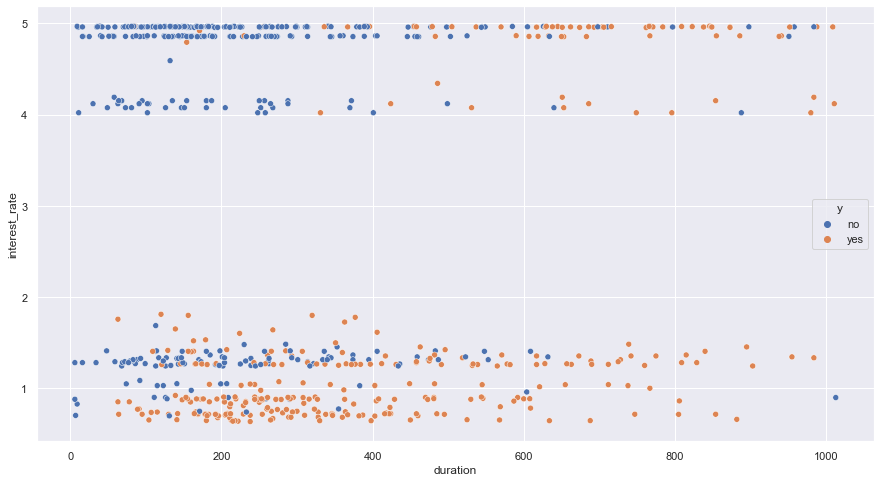

In [229]:
sns.scatterplot(data=df,y='interest_rate',x='duration',hue='y')

In [230]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [231]:
df['y'].value_counts()

no     363
yes    323
Name: y, dtype: int64

In [232]:
target_enc={'yes':1,'no':0}

In [233]:
df['y']=df['y'].map(target_enc)

In [234]:
df['y'].value_counts()

0    363
1    323
Name: y, dtype: int64

<AxesSubplot:>

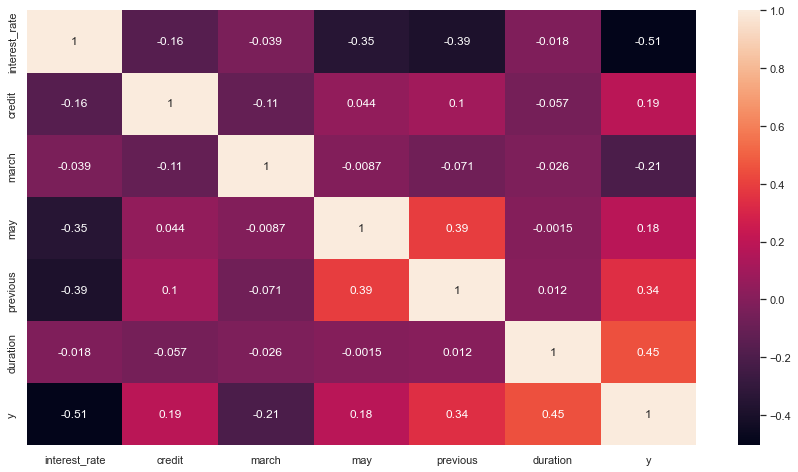

In [235]:
sns.heatmap(df.corr(),annot=True)

In [236]:
steps=[('scale',StandardScaler()),('model',LogisticRegression(random_state=7))]

In [237]:
pipline=Pipeline(steps=steps)

In [238]:
pipline

Pipeline(steps=[('scale', StandardScaler()),
                ('model', LogisticRegression(random_state=7))])

In [239]:
x=df.drop('y',axis=1)
y=df['y']

In [240]:
scores=cross_validate(pipline,x,y,scoring='accuracy',cv=5,return_train_score=True)

In [241]:
print('train_acc:',scores['train_score'].mean())
print('test_acc:',scores['test_score'].mean())

train_acc: 0.8600561073218724
test_acc: 0.8541944356289008


In [ ]:
## Let's apply different models

In [242]:
##let's make it much complexity  
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
x_poly

array([[1.0000e+00, 1.3340e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3689e+04],
       [1.0000e+00, 7.6700e-01, 0.0000e+00, ..., 1.0000e+00, 2.7400e+02,
        7.5076e+04],
       [1.0000e+00, 4.8580e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.7889e+04],
       ...,
       [1.0000e+00, 1.2810e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.1560e+03],
       [1.0000e+00, 7.3900e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.4289e+04],
       [1.0000e+00, 1.0460e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.6644e+04]])

In [244]:
steps=[('scale',StandardScaler()),('model',LogisticRegression(random_state=7))]

In [245]:
pipeline_2=Pipeline(steps=[('scale',StandardScaler()),('model',LogisticRegression(random_state=7))])

In [246]:
pipeline_2

Pipeline(steps=[('scale', StandardScaler()),
                ('model', LogisticRegression(random_state=7))])

In [254]:
score_2=cross_validate(pipeline_2,x_poly,y,return_train_score=True,scoring='accuracy')
print("train acc:",score_2['train_score'].mean())
print("test acc",score_2['test_score'].mean())

train acc: 0.8633347958464628
test acc 0.8600126943827355


In [255]:
#not big differnce

## <font color='red'> Thank You!